# Filter characterization

### Filter with one peak

In [69]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#parameters: wavelength range, transmission, filter name
#return parameters: dictionary with name, wavelength at maxmum transmission, maximum transmission, FWHM, central wavelength 
#additionally: plot spectrum, wavelength at maxmum transmission, maximum transmission, FWHM, central wavelength 

def characterize_filter_peak(wavelength_range, transmission, filter_name):
    max_transmission_index = np.argmax(transmission) #find index where the transission has maximum
    max_transmission = transmission[max_transmission_index] #find value of maximum transition 
    max_transmission_wavelength = wavelength_range[max_transmission_index] #find wavelength at maximum transition 


    FWHM_transmission = max_transmission/2 #calculate the half the maximum transmission 

    index_left = np.where(transmission[:max_transmission_index] <= FWHM_transmission) #get indices of wavelengths left of FWHM
    index_right = np.where(transmission[max_transmission_index:] <= FWHM_transmission) #get indices of wavelengths right of FWHM

    left_bound = index_left[0][-1] #get last index before FWHM to the left 
    right_bound = max_transmission_index + index_right[0][0] #get first index after FWHM to the right 

    left_wavelength = wavelength_range[left_bound] #get wavelength at last index before FWHM 
    right_wavelength = wavelength_range[right_bound] #get wavelength at first index after FWHM 

    FWHM = right_wavelength - left_wavelength #calculate FWHM as difference between the two wavelengths

    central_wavelength = left_wavelength + FWHM/2 #calculate central wavelength

    #save data in dictionary 
    characterization = {
        "Name": filter_name, 
        "Peak transmission wavelength (nm)": max_transmission_wavelength,
        "Peak transmission (%)": max_transmission,
        "FWHM (nm)": FWHM,
        "Central wavelength (nm)": central_wavelength,
    }

    #plot spectrum, FWHM, wavelength at maximum transmission and central wavelength  
    plt.plot(wavelength_range, transmission, color="hotpink")
    plt.axhline(FWHM_transmission, label="FWHM transmission", color="red", linestyle="dotted")
    plt.axvline(max_transmission_wavelength, label="Maximum transmission wavelength", color="purple", linestyle="dotted")
    plt.axvline(central_wavelength, label="Central wavelength", color="brown", linestyle="dotted")
    plt.title(filter_name)
    plt.legend()
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Transmission (%)")
    plt.show()

    return characterization


### Broad filter

In [77]:
#parameters: wavelength range, transmission, filter name
#return parameters: dictionary with name, mean transmission in UV, visible & IR and blocked ranges
#additionally: plot spectrum, mean transmission in UV, visible & IR


def characterize_filter_broad(wavelength_range, transmission, filter_name):
    uv_range = np.linspace(300, 400, 100) #define  UV range
    vis_range = np.linspace(400, 700, 300) #define visible range
    ir_range = np.linspace(700, 1000, 300) #define IR range

    uv_index = np.where((wavelength_range >= uv_range[0]) & (wavelength_range <= uv_range[-1])) #get indices of all wavelengths in UV range
    vis_index = np.where((wavelength_range >= vis_range[0]) & (wavelength_range <= vis_range[-1])) #get indices of all wavelengths in visible range
    ir_index = np.where((wavelength_range >= ir_range[0]) & (wavelength_range <= ir_range[-1])) #get indices of all wavelengths in IR range
    
    mean_transmission_uv = np.mean(transmission[uv_index]) #calculate the mean transmission of wavelengths in UV range
    mean_transmission_vis = np.mean(transmission[vis_index]) #calculate the mean transmission of wavelengths in visible range
    mean_transmission_ir = np.mean(transmission[ir_index]) #calculate the mean transmission of wavelengths in IR range

    blocked_region = np.where(transmission < 10) #define blocked region as transmission being less than 10%
    blocked_wavelengths = wavelength_range[blocked_region] #find wavelengths where transission is smaller than 10%

    wav = [] #empty list to save blocked wavelength ranges in 
    start = blocked_wavelengths[0] #start at the first of blocked wavelengths 

    for i in range(len(blocked_wavelengths) - 1):
        if blocked_wavelengths[i+1] > blocked_wavelengths[i] + 50: #check if there are more than 50nm between two wavelengths that are blocked
            end = blocked_wavelengths[i] #define end of blocked region when there are 50nm between two blocked wavelengths
            wav.append((start, end)) #append tuple to list
            start = blocked_wavelengths[i+1] #define new starting wavelength

    end = blocked_wavelengths[-1] #the last blocked wavelength is the last element of the blocked wavelengths
    wav.append((start, end))

    blocked_ranges = [] #empty list to store string of blocked wavelength ranges in 
    for i in range(len(wav)): #iterate through blocked wavelength ranges
        start_i = str(wav[i][0]) #convert start wavelength to string
        end_i = str(wav[i][1])  #convert end wavelength to string
        range_i = start_i + "-" + end_i #seperate start and end with a hyphen 
        blocked_ranges.append(range_i) #append string to list
        
    #save data in dictionary 
    characterization = {
        "Name: ": filter_name, 
        "Mean transmission UV (%)": mean_transmission_uv,
        "Mean transmission visible (%)": mean_transmission_vis,
        "Mean transmission IR (%)": mean_transmission_ir,
        "Blocked wavelengths (nm)": blocked_ranges,
    }

    #plot spectrum, mean transmission in UV, visible & IR
    plt.plot(wavelength_range, transmission, color="hotpink")
    plt.hlines(mean_transmission_uv, uv_range[0], uv_range[-1], label="Mean transmission in UV", color="red", linestyle="dotted")
    plt.hlines(mean_transmission_vis, vis_range[0], vis_range[-1], label="Mean transmission in visible range", color="purple", linestyle="dotted")
    plt.hlines(mean_transmission_ir, ir_range[0], ir_range[-1], label="Mean transmission in IR", color="orange", linestyle="dotted")
    plt.title(filter_name)
    plt.legend()
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Transmission (%)")
    plt.show()


    return characterization


### Filter with multiple peaks

In [71]:
#parameters: wavelength range, transmission, filter name
#return parameters: dictionary with name, dictionary of peaks (number, wavelength at maxmum transmission, maximum transmission, FWHM, central wavelength), blocked ranges, range
#additionally: plot spectrum, peaks

from scipy.signal import find_peaks

def characterize_filter_multiple_peaks(wavelength_range, transmission, filter_name):
    peaks, _ = find_peaks(transmission, height=0, prominence=1) #identify peaks in spectrum 

    peak_characterizations = [] #empty list to store characterizations of peaks in
    peaks_range_list = [] #empty list to store range of peaks in 

    #characterization for every peak 
    for i, peak_index in enumerate(peaks):
        max_transmission = transmission[peak_index] #get maximum transmission for every peak
        max_transmission_wavelength = wavelength_range[peak_index]  #get wavelength of maximum transmission for every peak

        FWHM_transmission = max_transmission/2 #calculate the half the maximum transmission 

        index_left = np.where(transmission[:peak_index] <= FWHM_transmission) #get indices of wavelengths left of FWHM
        index_right = np.where(transmission[peak_index:] <= FWHM_transmission) #get indices of wavelengths right of FWHM

        #condition to check if the peak is at the beginning of the spectrum
        if len(index_left[0]) > 0: 
            left_bound = index_left[0][-1] #get last index before FWHM to the left 
        else: 
            left_bound = 0 #set index of left bound to 0 if peak is first value in range 

        #condition to check if the peak is at the end of the spectrum
        if len(index_right[0]) > 0:
            right_bound = peak_index + index_right[0][0] #get first index before FWHM to the right 
        else: 
            right_bound = len(wavelength_range) - 1 #set left bound to index of last wavelength value if peak is last value in range 

        left_wavelength = wavelength_range[left_bound] #get wavelength at last index before FWHM 
        right_wavelength = wavelength_range[right_bound] #get wavelength at first index after FWHM 

        FWHM = right_wavelength - left_wavelength #calculate FWHM as difference between the two wavelengths

        central_wavelength = left_wavelength + FWHM/2 #calculate central wavelength

        #save data in dictionary 
        peak_characterization = {
        "Peak": i+1,
        "Peak transmission wavelength (nm)": max_transmission_wavelength,
        "Peak transmission (%)": max_transmission,
        "FWHM (nm)": FWHM,
        "Central wavelength (nm)": central_wavelength,
        }

        peak_characterizations.append(peak_characterization) #append information for peak in list 
        peaks_range_list.append((left_wavelength, right_wavelength)) #save left and right boarder of FWHM of peak in list 


    peaks_range_left = str(peaks_range_list[0][0]) #get left boarder of FWHM of first peak and convert it to string
    peaks_range_right = str(peaks_range_list[-1][-1]) #get right boarder of FWHM of last peak and convert it to string
    peaks_range = peaks_range_left + "-" + peaks_range_right #define range of peaks


    blocked_region = np.where(transmission < 10) #define blocked region as transmission being less than 10%
    blocked_wavelengths = wavelength_range[blocked_region] #find wavelengths where transission is smaller than 10%

    wav = [] #empty list to save blocked wavelength ranges in 
    start = blocked_wavelengths[0] #start at the first of blocked wavelengths 

    for i in range(len(blocked_wavelengths) - 1):
        if blocked_wavelengths[i+1] > blocked_wavelengths[i] + 50: #check if there are more than 50nm between two wavelengths that are blocked
            end = blocked_wavelengths[i] #define end of blocked region when there are 50nm between two blocked wavelengths
            wav.append((start, end))  #append tuple to list
            start = blocked_wavelengths[i+1] #define new starting wavelength

    end = blocked_wavelengths[-1] #the last blocked wavelength is the last element of the blocked wavelengths
    wav.append((start, end))

    blocked_ranges = [] #empty list to store string of blocked wavelength ranges in 
    for i in range(len(wav)):  #iterate through blocked wavelength ranges
        start_i = str(wav[i][0]) #convert start wavelength to string
        end_i = str(wav[i][1]) #convert end wavelength to string
        range_i = start_i + "-" + end_i #seperate start and end with a hyphen 
        blocked_ranges.append(range_i) #append string to list

    #save data in dictionary 
    characterization = {
        "Name": filter_name,
        "Peaks": peak_characterizations,
        "Blocked wavelengths (nm)": blocked_ranges,
        "Range (nm)": peaks_range,
    }

    colors = plt.cm.tab10(np.linspace(0, 1, len(peaks))) #define colormap with as many colors as there are peaks

    #plot spectrum, peaks 
    plt.plot(wavelength_range, transmission, color="hotpink")
    for i, peak in enumerate(peak_characterizations):
        plt.axvline(peak["Peak transmission wavelength (nm)"], linestyle="dotted", color=colors[i], label=f"Peak {peak['Peak']}")
    plt.title(filter_name)
    plt.legend()
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Transmission (%)")
    plt.show()
    
    return characterization

### Examples

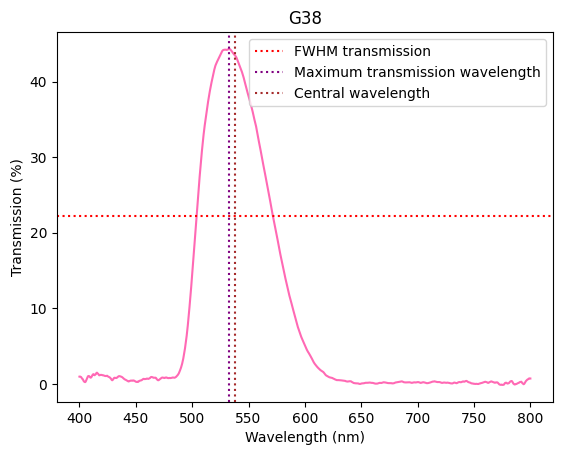

{'Name': 'G38', 'Peak transmission wavelength (nm)': np.float64(532.6658322903629), 'Peak transmission (%)': np.float64(44.33), 'FWHM (nm)': np.float64(68.08510638297872), 'Central wavelength (nm)': np.float64(537.6720901126408)}


In [72]:
#Filter with one peak

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_g38 = np.loadtxt('g38.txt') #read in data

wavelength_g38 = np.array(data_g38[:, 0]) #extract the wavelengths
transmission_g38 = np.array(data_g38[:, 1]) #extract the transmission

wavelength_g38_cut = np.linspace(400, 800, 800) #define wavelength range of interest
transmission_g38_cut = transmission_g38[400+35:1200+35] #cut out transmission in wavelength range of interest 

g38 = characterize_filter_peak(wavelength_g38_cut, transmission_g38_cut, "G38") #call function with correct wavelength, trnsmission and name 
print(g38) #print results


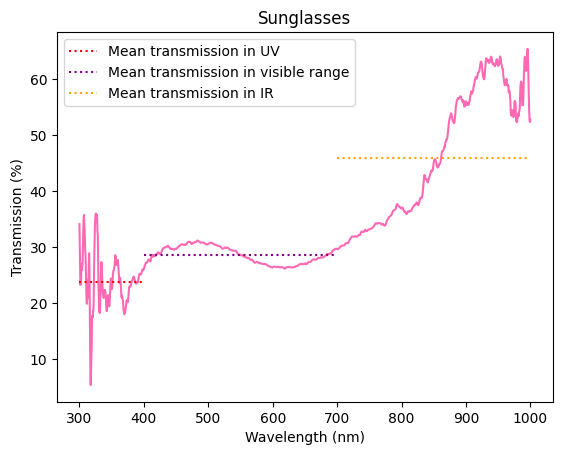

{'Name: ': 'Sunglasses', 'Mean transmission UV (%)': np.float64(23.862454500000002), 'Mean transmission visible (%)': np.float64(28.596751666666666), 'Mean transmission IR (%)': np.float64(45.94821999999999), 'Blocked wavelengths (nm)': ['317.012151536812-318.0128663330951']}


In [78]:
#Broad filter 

data_sun = np.loadtxt('sonnenbrille.txt') #read in data

wavelength_sun = np.array(data_sun[:, 0]) #extract the wavelengths
transmission_sun = np.array(data_sun[:, 1]) #extract the transmission

wavelength_sun_cut = np.linspace(300, 1000, 1400) #define wavelength range of interest
transmission_sun_cut = transmission_sun[200+35:1600+35] #cut out transmission in wavelength range of interest 

sunglasses = characterize_filter_broad(wavelength_sun_cut, transmission_sun_cut, "Sunglasses") #call function with correct wavelength, trnsmission and name 
print(sunglasses) #print results

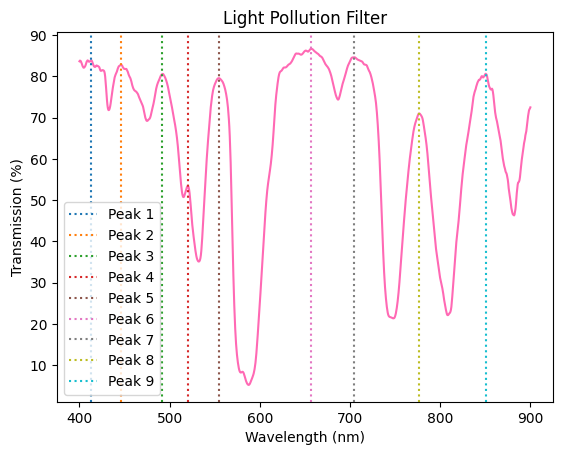

{'Name': 'Light Pollution Filter', 'Peaks': [{'Peak': 1, 'Peak transmission wavelength (nm)': np.float64(413.013013013013), 'Peak transmission (%)': np.float64(83.902), 'FWHM (nm)': np.float64(126.6266266266266), 'Central wavelength (nm)': np.float64(463.3133133133133)}, {'Peak': 2, 'Peak transmission wavelength (nm)': np.float64(446.04604604604606), 'Peak transmission (%)': np.float64(82.837), 'FWHM (nm)': np.float64(126.6266266266266), 'Central wavelength (nm)': np.float64(463.3133133133133)}, {'Peak': 3, 'Peak transmission wavelength (nm)': np.float64(492.0920920920921), 'Peak transmission (%)': np.float64(80.578), 'FWHM (nm)': np.float64(127.1271271271271), 'Central wavelength (nm)': np.float64(463.56356356356355)}, {'Peak': 4, 'Peak transmission wavelength (nm)': np.float64(520.1201201201202), 'Peak transmission (%)': np.float64(53.443), 'FWHM (nm)': np.float64(171.67167167167167), 'Central wavelength (nm)': np.float64(485.83583583583584)}, {'Peak': 5, 'Peak transmission wavelengt

In [74]:
#Filter with multiple peaks

data_pollution = np.loadtxt('lichtverschmutzung.txt') #read in data

wavelength_pollution = np.array(data_pollution[:, 0]) #extract the wavelengths
transmission_pollution = np.array(data_pollution[:, 1]) #extract the transmission

wavelength_pollution_cut = np.linspace(400, 900, 1000) #define wavelength range of interest
transmission_pollution_cut = transmission_pollution[400+35:1400+35] #cut out transmission in wavelength range of interest 

pollution = characterize_filter_multiple_peaks(wavelength_pollution_cut, transmission_pollution_cut, "Light Pollution Filter") #call function with correct wavelength, trnsmission and name 
print(pollution) #print results